### Converting OD9_7 to a json cache file

New file : molecules indexed on canonical smiles. For each molecule, keys: success, homo, lumo, xyz data
A molecule is a success if the smiles after DFT has stayed the same and if has non nan

In [1]:
import os

OD9_7_path = os.environ["DATA"] + "/00_datasets/DFT/OD9_7/OD9_step7.json"
output_path = os.environ["DATA"] + "/00_datasets/DFT/cache_OD9_step7.json"


In [3]:
import json
from tqdm import tqdm
from rdkit.Chem import MolFromSmiles, MolToSmiles

def compute_cache():
    
    complete_output_dict = {}

    with open(OD9_7_path) as json_file:
        data = json.load(json_file)
        print(len(data))
        
    # Enumerating all molecules
    for mol_input_data in tqdm(data):
        
        
        # Extracting properties data
        homo = mol_input_data["homo"]
        lumo = mol_input_data["lumo"]
        gap = mol_input_data["gap"]
        
        # Extracting success data
        has_no_nan = mol_input_data["has_no_nan"]
        smiles_identical = mol_input_data["smiles_is_identical_after_DFT"]
        
        # Extracting smiles (with explicit canonicalization)
        can_smiles = MolToSmiles(MolFromSmiles(mol_input_data["can_smi_before"]))
        
        # Extracting geometry data
        xyz_data = mol_input_data["xyz"]
        
        # Writing data to output dictionary
        complete_output_dict[can_smiles] = {
            "success": has_no_nan and smiles_identical,
            "homo": homo*27.2114,
            "lumo": lumo*27.2114,
            "gap": gap*27.2114,
            "xyz": xyz_data
        }
    
    with open(output_path, "w") as f:
        json.dump(complete_output_dict, f)
    

In [4]:
compute_cache()


  0%|          | 1273/435032 [00:00<00:34, 12728.68it/s]

435032


100%|██████████| 435032/435032 [00:30<00:00, 14177.83it/s]


### Plot HOMO/LUMO distribution

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import json

def plot(key):
    
    with open(output_path) as json_file:
        data = json.load(json_file)
    
    values = []
        
    for k, v in data.items():
        if v["success"]:
            values.append(v[key])
            
            
    print(len(values))
    print(np.mean(values))
    
    sns.distplot(values)
        
    

434600
-6.165670689251093


/home/jleguy/anaconda3/envs/chem2020/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


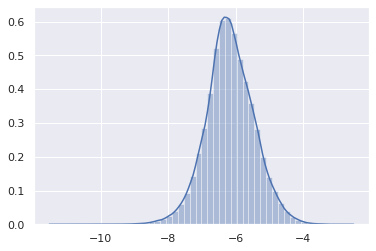

In [6]:
plot("homo")

434600
-0.10345648973569219


/home/jleguy/anaconda3/envs/chem2020/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


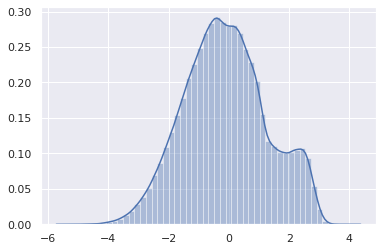

In [7]:
plot("lumo")

434600
-6.062214199515402


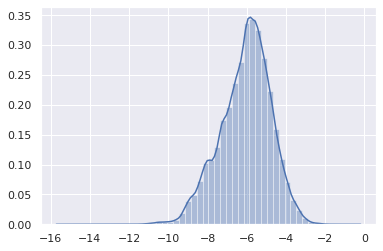

In [9]:
plot("gap")

### Counting shingles

In [10]:
from bbo.descriptor import ShinglesVectDesc
import json

with open(output_path, "r") as f:
    d = json.load(f)
    
desc_builder = ShinglesVectDesc()
desc_builder.transform(list(d.keys()))
print(desc_builder.min_row_size())

1552


In [11]:
desc_builder = ShinglesVectDesc()
desc_builder.transform(list(d.keys())[:10000])
print(desc_builder.min_row_size())

587


In [12]:
import numpy as np
desc_builder = ShinglesVectDesc()
np.sum(desc_builder.transform(["C"])[0])

0.0